##### **Memanggil Library**

In [1]:
import io, zipfile
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
import plotly.express as px
import statsmodels.api as sm
import plotly.io as pio
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.cluster import KMeans,AgglomerativeClustering
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial.distance import pdist, squareform

##### **Ekstrak Zip**

In [2]:
local_zip = './zip/Marketing Campaign.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./data')
zip_ref.close()

##### **Mengecek Dataset**

In [3]:
df = pd.read_excel('./data/marketing_campaign.xlsx')
# Dapatkan bentuk kerangka data
df.shape

(2240, 29)

In [4]:
# Dapatkan bagian utama dari kerangka data
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [5]:
# Get the tail of the dataframe
df.tail()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,2012-10-15,40,84,...,7,0,0,0,0,0,0,3,11,1


In [6]:
# Get the information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [7]:
# Get the summary statistics of the dataframe
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [8]:
# Get the data type of each column in the dataframe
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

## **Data Preparation**

##### **Missing Data**

In [9]:
# Check for missing data
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

<Axes: >

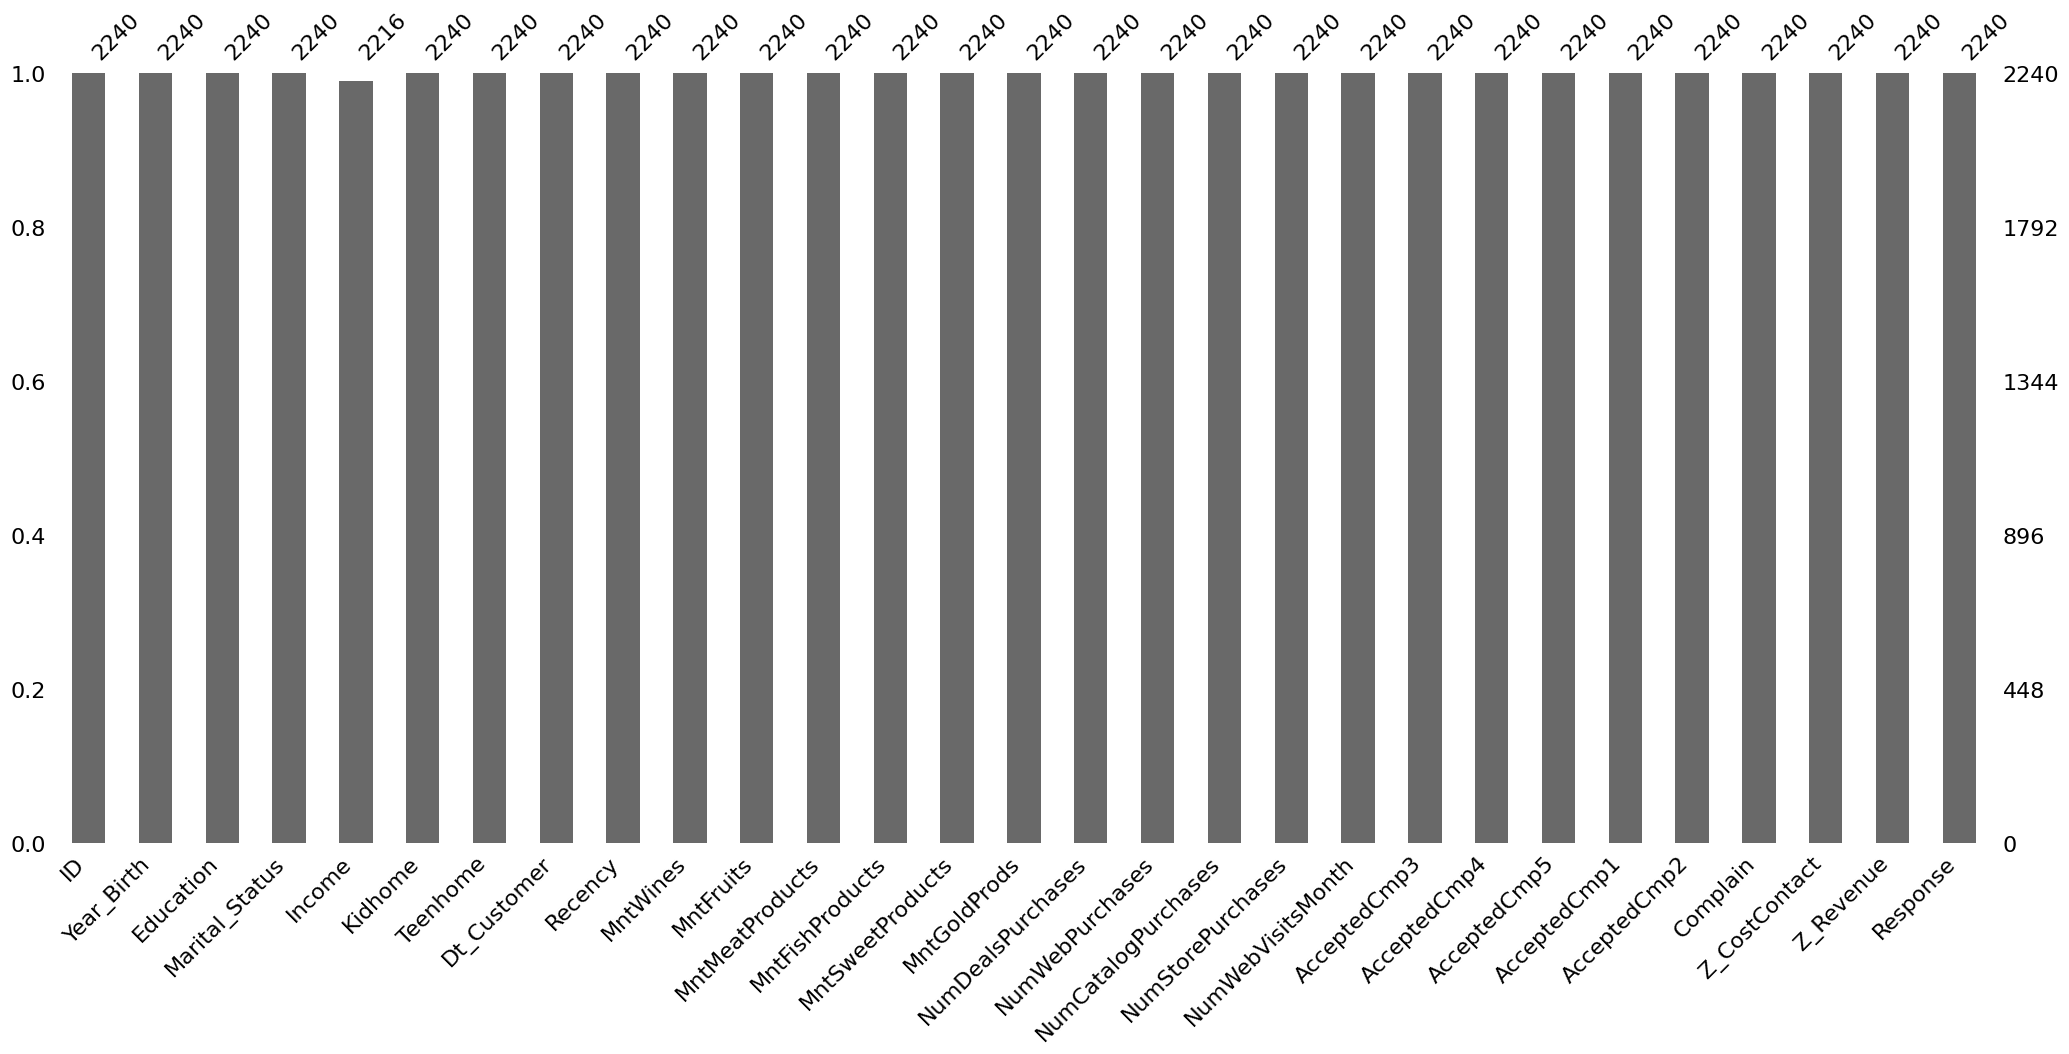

In [10]:
# Visualize missing data
msno.bar(df)

<Axes: >

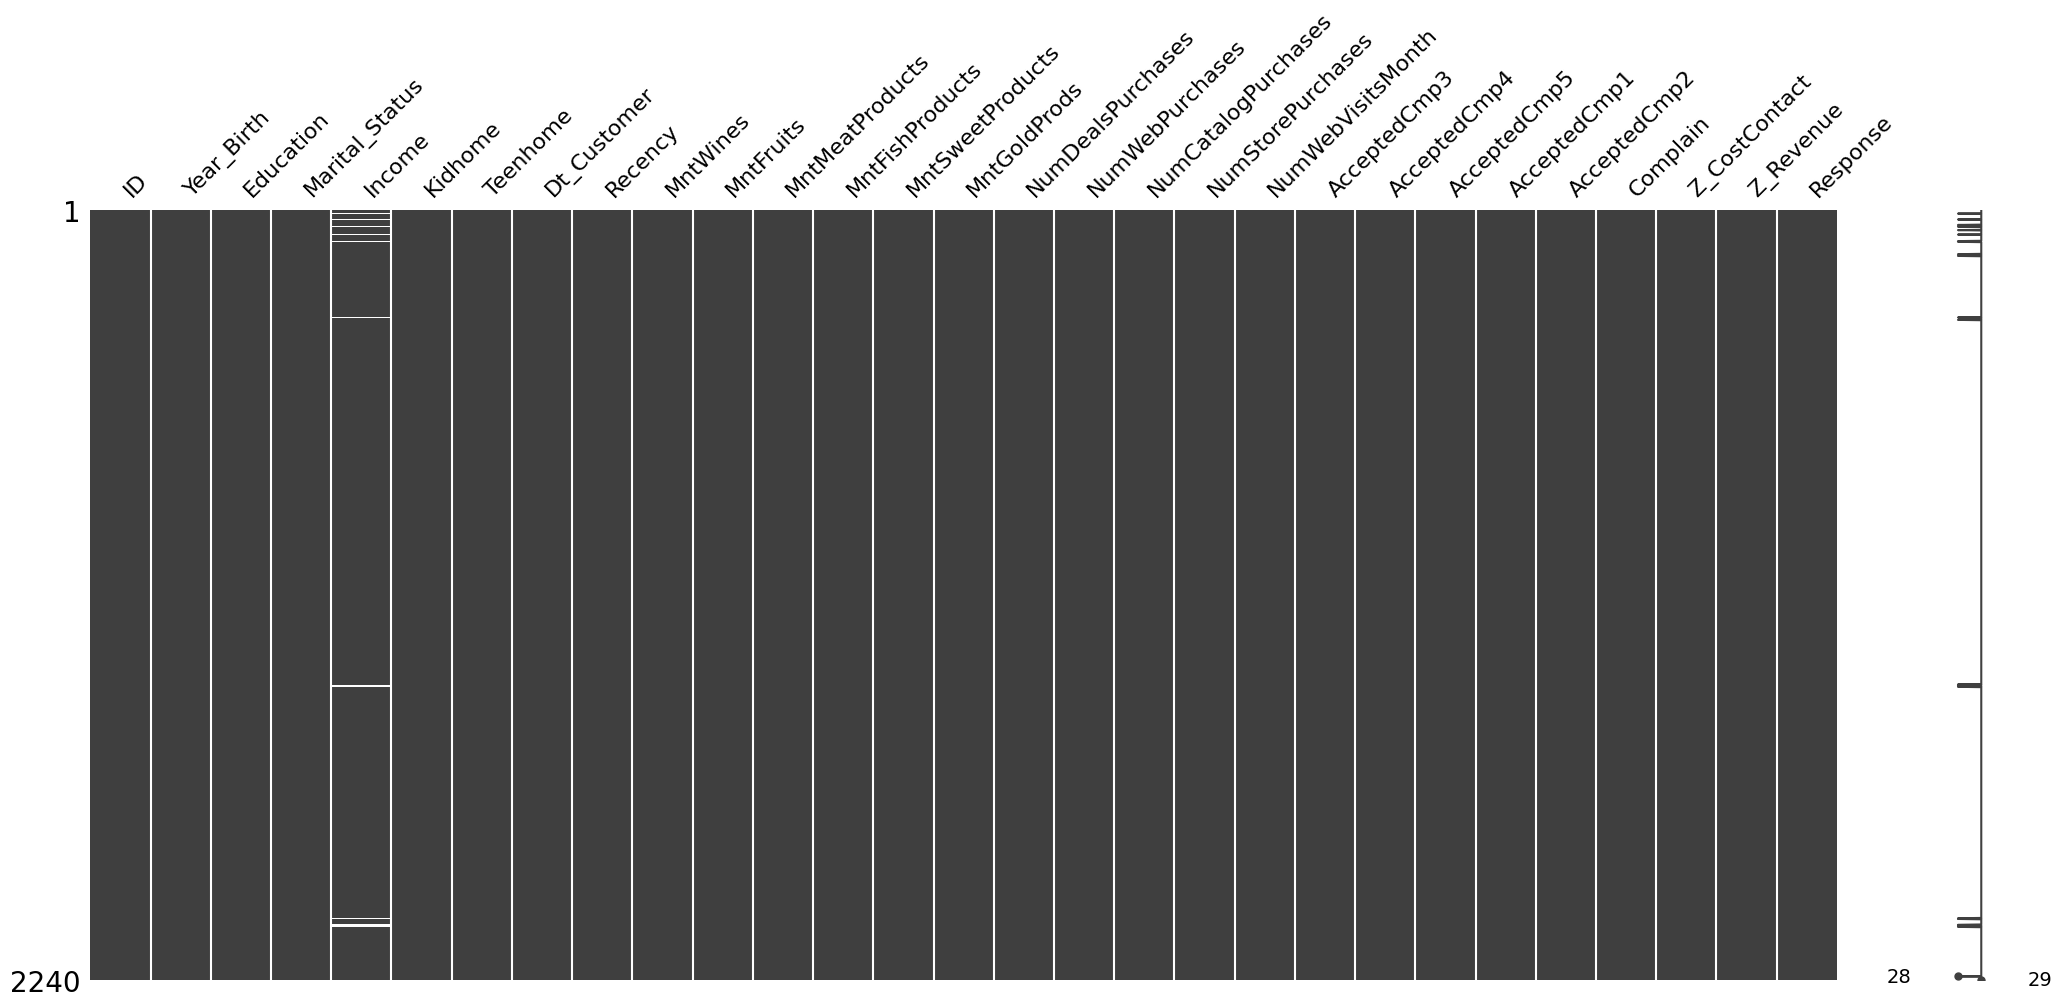

In [11]:
# Visualize missing data
msno.matrix(df)

Mengingat data yang hilang hanya ada pada satu kolom dan hanya sebagian kecil (24
dari 2240)  dari total data, kami memutuskan untuk membuang nilai-nilai yang hilang ini tanpa
secara signifikan mempengaruhi integritas data secara keseluruhan.

In [12]:
df = df.dropna()
df.duplicated().sum()

0

## **Outliers**

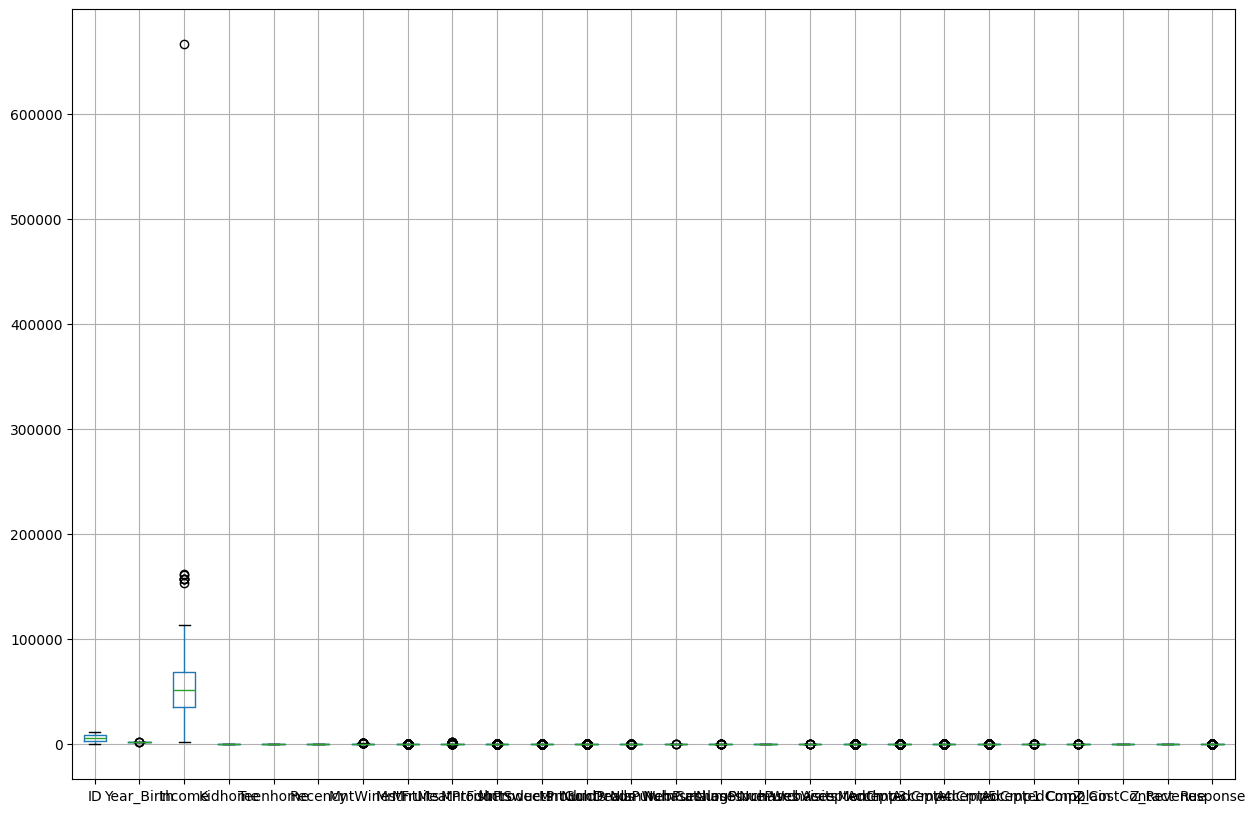

In [13]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(15, 10))
# Plot the box plots for all columns
df.boxplot(ax=ax)
# Show the plot
plt.show()

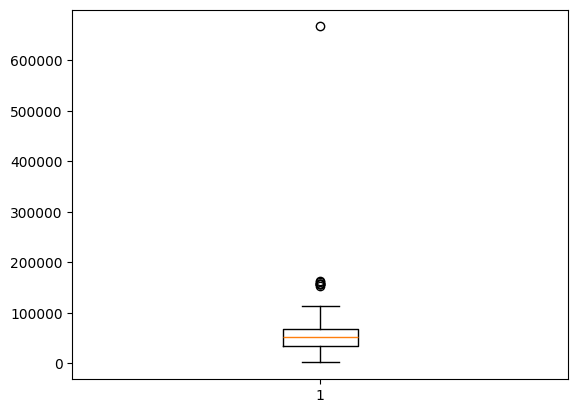

In [14]:
# Plot the distribution of a column to visualize the outliers
plt.boxplot(df['Income'])
plt.show()

Jumlah outlier di kolom Pendapatan: 8
Bentuk kerangka data yang diperbarui: (2208, 29)


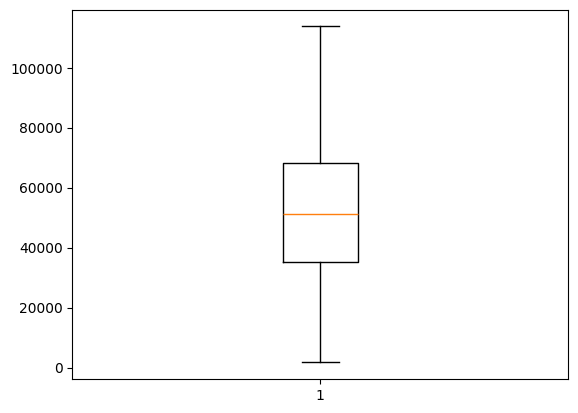

In [15]:
# Calculate the IQR for the Income column
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)
IQR = Q3 - Q1
# Identify the outliers in the Income column
outliers = df[(df['Income'] < (Q1 - 1.5 * IQR)) | (df['Income'] > (Q3 + 1.5 * IQR))]
# Print the number of outliers
print("Jumlah outlier di kolom Pendapatan:", len(outliers))
# Remove the outliers in the Income column
df = df[~((df['Income'] < (Q1 - 1.5 * IQR)) | (df['Income'] > (Q3 + 1.5 * IQR)))]
# Print the updated shape of the dataframe
print("Bentuk kerangka data yang diperbarui:", df.shape)
# Plot the distribution of a column to visualize the outliers
plt.boxplot(df['Income'])
plt.show()

## **Feature engineering**
##### **Creating new features/columns**

In [16]:
print("Nilai unik di kolom Education:", df['Education'].unique())
print("Unilai-nilai nique di kolom Marital_Status:", df['Marital_Status'].unique())

Nilai unik di kolom Education: ['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
Unilai-nilai nique di kolom Marital_Status: ['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']


In [17]:
def education_level(education):
    if education in ['Graduation', 'PhD', 'Master']:
        return 'High'
    elif education in ['Basic']:
        return 'Middle'
    else:
        return 'Low'

df['Education_Level'] = df['Education'].apply(education_level)
def living_status(marital_status):
    if marital_status in ['Alone', 'Absurd', 'YOLO']:
        return 'Living Alone'
    else:
        return 'Living with Others'
df['Living_Status'] = df['Marital_Status'].apply(living_status)

##### **Creating Age**

In [18]:
df['Age'] = 2022 - df['Year_Birth']

##### **Creating Total number of campaigns accepted**

In [19]:
df['Total_Campaigns_Accepted'] = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].sum(axis=1)

##### **Creating Average spend per purchase:**

In [20]:
df['Average_Spend'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts','MntSweetProducts','MntGoldProds']].sum(axis=1)

##### **Creating Spent**

In [21]:
df['Spent'] = df['MntWines']+df["MntWines"] +df['MntFruits']+ df['MntMeatProducts'] + df['MntSweetProducts']+df["MntGoldProds"]

##### **Creating "Is_Parent" to indicate parenthood status:**

In [22]:
df['Is_Parent'] = (df['Kidhome'] + df['Teenhome'] > 0).astype(int)

##### **Creating total spending in the last 2 years || average monthly visits to the company'swebsite || ratio of online purchases to total purchases**

In [23]:
# create new feature for total spending in the last 2 years
df['total_spending'] = df['MntWines']+df["MntWines"] +df['MntFruits']+ df['MntMeatProducts'] + df['MntSweetProducts']+df["MntGoldProds"]
# create new feature for average monthly visits to the company's website
df['avg_web_visits'] = df['NumWebVisitsMonth'] / 12
# create new feature for the ratio of online purchases to total purchases
df['online_purchase_ratio'] = df['NumWebPurchases'] / (df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumWebVisitsMonth'])

##### **Dropping non relevant Columns/Features**

In [24]:
to_drop = ['Dt_Customer', 'Z_CostContact', 'Z_Revenue', 'Year_Birth', 'ID']
df = df.drop(to_drop, axis=1)
df.dtypes

Education                    object
Marital_Status               object
Income                      float64
Kidhome                       int64
Teenhome                      int64
Recency                       int64
MntWines                      int64
MntFruits                     int64
MntMeatProducts               int64
MntFishProducts               int64
MntSweetProducts              int64
MntGoldProds                  int64
NumDealsPurchases             int64
NumWebPurchases               int64
NumCatalogPurchases           int64
NumStorePurchases             int64
NumWebVisitsMonth             int64
AcceptedCmp3                  int64
AcceptedCmp4                  int64
AcceptedCmp5                  int64
AcceptedCmp1                  int64
AcceptedCmp2                  int64
Complain                      int64
Response                      int64
Education_Level              object
Living_Status                object
Age                           int64
Total_Campaigns_Accepted    

## **Exploratory data analysis**
##### **Distribution of Income**

In [25]:
init_notebook_mode(connected=True)

Histogram ini menunjukkan sebaran kolom Pendapatan yang mewakili pendapatan
setiap pelanggan. Sumbu x menunjukkan kisaran pendapatan, dan sumbu y menunjukkan jumlah pendapatan
pelanggan yang termasuk dalam setiap rentang. Histogram membantu kita memahami penyebaran pendapatan
di antara pelanggan, dan apakah terdapat outlier atau anomali dalam data

In [26]:
fig0 = px.histogram(df, x="Income", nbins=50)
fig0.show()

### **Distribution of Age**
Kode ini akan memplot histogram yang menunjukkan distribusi kolom 'age' pada data. Sumbu x akan mewakili usia dan sumbu y akan mewakili jumlah pelanggan dengan usia tersebut

In [27]:
fig1 = px.histogram(df, x="Age", nbins=30, color='Age', title="Distribution of Age")
fig1.show()

### **Marital Status Distribution**
Plotnya menunjukkan sebaran pelanggan berdasarkan status perkawinannya, yang mungkin bermanfaat
dalam memahami struktur keluarga yang berbeda

In [28]:
fig2 = px.histogram(df, x='Marital_Status', nbins=5, title="Marital Status Distribution")
fig2.show()

### **Education Level Distribution**
Plot tersebut menunjukkan sebaran pelanggan berdasarkan tingkat pendidikannya, yang dapat bermanfaat
dalam memahami tingkat pendidikan dan potensi tingkat pendapatan pelanggan

In [29]:
fig3 = px.histogram(df, x='Education_Level', nbins=5, title="Education Level Distribution")
fig3.show()

### **Average Spend by Marital Status**

In [30]:
df_plot = df.groupby(['Marital_Status'])['Average_Spend'].mean().reset_index()
fig4 = px.bar(df_plot, x='Marital_Status', y='Average_Spend', color='Marital_Status')
fig4.show()

### **Average Spend by Education Level**

In [31]:
df_plot = df.groupby(['Education_Level'])['Average_Spend'].mean().reset_index()
fig5 = px.bar(df_plot, x='Education_Level', y='Average_Spend', color='Education_Level')
fig5.show()

### **The distribution of number of children in household**
Plot ini menunjukkan sebaran jumlah anak dalam rumah tangga. Ini membantu untuk melihat
banyaknya rumah tangga yang mempunyai 0 anak, 1 anak, 2 anak, dst

In [32]:
# Plot the distribution of number of children in household
fig6 = px.histogram(df, x='Kidhome')
fig6.show()

## **The distribution of number of teenagers in household**
plot ini menunjukkan sebaran jumlah remaja dalam rumah tangga. Ini membantu untuk melihat
jumlah rumah tangga dengan 0 remaja, 1 remaja, 2 remaja, dst

In [33]:
fig7 = px.histogram(df, x='Teenhome')
fig7.show()

### **Total Campaigns Accepted Distribution**
"Total Distribusi Kampanye yang Diterima", kami merencanakan histogramnya
Kolom Total_Kampanye_Diterima. Plot ini akan menunjukkan kepada kita distribusi jumlahnya
kampanye yang diterima oleh setiap pelanggan.

In [34]:
fig8 = px.histogram(df, x='Total_Campaigns_Accepted', nbins=20, title="Total Campaigns Accepted Distribution")
fig8.show()

### **Average Spend per Purchase Distribution**
"Distribusi Pembelanjaan Rata-Rata per Pembelian", kami sedang memplot histogram kolom Pembelanjaan Rata-rata. Plot ini akan menunjukkan kepada kita distribusi rata-rata pembelanjaan per pembelian yang dilakukan oleh setiap pelanggan

In [35]:
fig9 = px.histogram(df, x='Average_Spend', nbins=20, title="Average Spend per Purchase Distribution")
fig9.show()

### **Spending Distribution by Marital Status, Spending Distribution by Education Level And Spending Distribution by Is_Parent**
Plot ini bertujuan untuk menunjukkan distribusi pengeluaran di berbagai kategori Perkawinan
Status, Tingkat Pendidikan dan Is_Parent. Histogram memungkinkan kita melihat frekuensi yang berbeda
tingkat pembelanjaan di setiap kategori dan membandingkan distribusi belanja antar kategori.

In [36]:
fig10 = px.histogram(df, x='total_spending', color='Marital_Status', nbins=50,title='Spending Distribution by Marital Status')
fig11 = px.histogram(df, x='total_spending', color='Education_Level', nbins=50,title='Spending Distribution by Education Level')
fig12 = px.histogram(df, x='total_spending', color='Is_Parent', nbins=50,title='Spending Distribution by Is_Parent')
fig10.show()
fig11.show()
fig12.show()

### **The Distribution of Online Purchase Ratio**

In [37]:
fig13 = px.histogram(df, x='online_purchase_ratio')
fig13.show()

In [38]:
fig14 = px.histogram(df, x='NumWebVisitsMonth')
fig14.show()

### **The Distribution of Number of Web Purchases**

In [39]:
fig15 = px.histogram(df, x='NumWebPurchases')
fig15.show()

### **Distribution of Number of Catalog Purchases**

In [40]:
fig16 = px.histogram(df, x='NumCatalogPurchases')
fig16.show()

### **Distribution of Number of Store Purchases**

In [41]:
fig17 = px.histogram(df, x='NumStorePurchases')
fig17.show()

### **"NumWebPurchases" vs "NumStorePurchases"**
"Pembelian NumWeb" vs "Tidak Ada Pembelian di Toko" untuk melihat apakah ada hubungan antara kedua jenis pembelian tersebut. Plot kotak menunjukkan median, kuartil pertama dan ketiga, serta outlier data.

In [42]:
fig18 = px.box(df, x="NumWebPurchases", y="NumStorePurchases")
fig18.show()

### **scatter plot of "NumWebPurchases" vs "NumWebVisitsMonth"**
plot sebar "NumWebPurchases" vs "NumWebVisitsMonth" untuk melihat apakah ada korelasi antara pembelian web dan kunjungan. Plot pencar menunjukkan hubungan antara keduanya variabel sebagai titik data individual. Korelasi positif ditunjukkan dengan titik-titik yang bergerak darinya
kiri bawah ke kanan atas, sedangkan korelasi negatif ditunjukkan dengan titik-titik yang bergerak
kiri atas ke kanan bawah.

In [43]:
fig19 = px.scatter(df, x="NumWebPurchases", y="NumWebVisitsMonth")
fig19.show()

### **Scatter plot of "MntFruits" vs "MntMeatProducts"**
Plot sebar menunjukkan hubungan antara jumlah yang dibelanjakan untuk buah-buahan dan jumlahnya dihabiskan untuk produk daging.

In [44]:
fig20 = px.scatter(df, x="MntFruits", y="MntMeatProducts")
fig20.show()

### **Scatter plot of "MntWines" vs "MntSweetProducts"**
Plot sebar menunjukkan hubungan antara jumlah yang dibelanjakan untuk anggur dan jumlahnya
dihabiskan untuk produk manis

In [45]:
fig21 = px.scatter(df, x="MntWines", y="MntSweetProducts")
fig21.show()

### **Scatter plot of "MntWines" vs "MntSweetProducts" with a "Income"**
Plot sebar menunjukkan hubungan antara jumlah yang dibelanjakan untuk anggur dan jumlahnya
dibelanjakan untuk produk-produk manis, dengan variabel ketiga diwakili oleh ukuran. Ukuran penanda
mewakili jumlah kunjungan web per bulan, dan warna penanda mewakili
tingkat pendapatan

In [46]:
fig22 = px.scatter(df, x="MntWines", y="MntSweetProducts", size="NumWebVisitsMonth", color="Income", size_max=50)
fig22.show()

### **Violin plot of "AcceptedCmp1" vs "AcceptedCmp2" And Violin plot of "AcceptedCmp3" vs "AcceptedCmp4"**
Plot biola adalah jenis plot kotak yang menunjukkan kepadatan probabilitas data yang berbeda-beda
nilai-nilai. Plot biola menunjukkan sebaran data, meliputi median, kuartil, dan
distribusi datanya. Dalam kasus ini, kami menggunakan plot biola untuk melihat apakah ada hubungan
antara dua kampanye (AcceptedCmp1 vs AcceptedCmp2 dan AcceptedCmp3 vs
DiterimaCmp4). Jika ada hubungan antara kedua kampanye tersebut, maka plot biola akan memiliki hubungan tersebut
menunjukkan bentuk dan distribusi yang serupa, menunjukkan bahwa pelanggan yang menerimanya
kampanye cenderung menerima kampanye lainnya juga

In [47]:
fig23 = px.violin(df, x="AcceptedCmp1", y="AcceptedCmp2", box=True, points="all")
fig23.update_layout(title="AcceptedCmp1 vs AcceptedCmp2", xaxis_title="AcceptedCmp1", yaxis_title="AcceptedCmp2")

fig24 = px.violin(df, x="AcceptedCmp3", y="AcceptedCmp4", box=True, points="all")
fig24.update_layout(title="AcceptedCmp3 vs AcceptedCmp4", xaxis_title="AcceptedCmp3", yaxis_title="AcceptedCmp4")


fig23.show()
fig24.show()

### **Scatter plot of "NumDealsPurchases" vs "NumCatalogPurchases"**

In [48]:
fig25 = px.scatter(df, x="NumDealsPurchases", y="NumCatalogPurchases", trendline="ols")
fig25.show()

### **Pairplot of "Income", "NumWebPurchases", and "NumStorePurchases"**

In [49]:
fig26 = px.scatter_matrix(df, dimensions=["Income", "NumWebPurchases", "NumStorePurchases"])
fig26.show()

In [50]:
for i in range(27):
    fig = eval(f"fig{i}")
    pio.write_html(fig, file=f'fig{i}.html', auto_play=True)

df.dtypes

Education                    object
Marital_Status               object
Income                      float64
Kidhome                       int64
Teenhome                      int64
Recency                       int64
MntWines                      int64
MntFruits                     int64
MntMeatProducts               int64
MntFishProducts               int64
MntSweetProducts              int64
MntGoldProds                  int64
NumDealsPurchases             int64
NumWebPurchases               int64
NumCatalogPurchases           int64
NumStorePurchases             int64
NumWebVisitsMonth             int64
AcceptedCmp3                  int64
AcceptedCmp4                  int64
AcceptedCmp5                  int64
AcceptedCmp1                  int64
AcceptedCmp2                  int64
Complain                      int64
Response                      int64
Education_Level              object
Living_Status                object
Age                           int64
Total_Campaigns_Accepted    

## **Clustering**
### **One-hot encoding**

In [51]:
df = pd.get_dummies(df, columns=["Marital_Status", "Education","Education_Level","Living_Status"])

### **Data Scaling StandardScaler**

In [52]:
num_cols = ['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 
            'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
            'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 
            'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4',
            'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 
            'total_spending', 'avg_web_visits', 'online_purchase_ratio', 'Age', 
            'Total_Campaigns_Accepted', 'Is_Parent']

scaler = StandardScaler()

# Fit the scaler to the numerical columns
df[num_cols] = scaler.fit_transform(df[num_cols])

### **PCA**

In [53]:
pca = PCA(n_components=8)
df_pca = pca.fit_transform(df)

### **Determining the optimal number of clusters using Silhouette Score**

In [54]:
list_k = list(range(2, 10))
silhouette_scores = []
for k in list_k:
    km = KMeans(n_clusters=k)
    preds = km.fit_predict(df_pca)
    silhouette_scores.append(silhouette_score(df_pca, preds))

best_k = list_k[np.argmax(silhouette_scores)]
print(f"Hasil dari best_k : {best_k}\n")
print(f"Hasil dari silhouette_scores : {silhouette_scores}")

c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning:

Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.

  File "c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n

Hasil dari best_k : 2

Hasil dari silhouette_scores : [0.6776498815958363, 0.6547016450125837, 0.616385025075055, 0.60889068467192, 0.5935017470930427, 0.5802632033593935, 0.5566301464010003, 0.550533034265817]


### **kmeans**

In [55]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(df_pca)

c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=4)

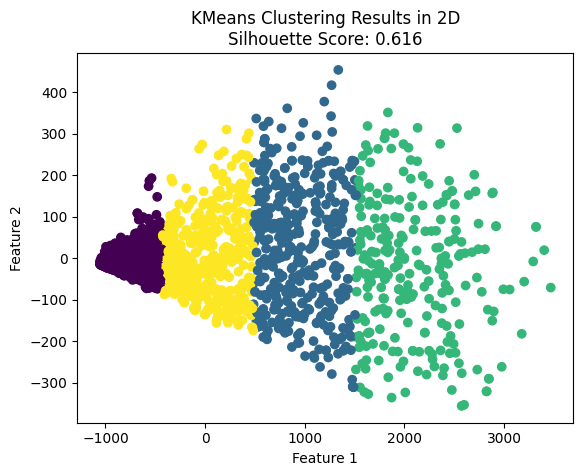

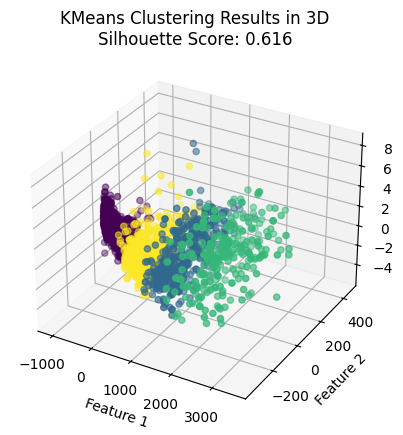

In [56]:
# Get the predictions
predictions = kmeans.predict(df_pca)

# Calculate the silhouette score
silhouette_score_value = silhouette_score(df_pca, predictions)

# Calculate the Calinski-Harabasz Index
calinski_harabasz_score_value = calinski_harabasz_score(df_pca, predictions)

# Calculate the Davies-Bouldin Index
davies_bouldin_score_value = davies_bouldin_score(df_pca, predictions)

# Visualize the results in 2D
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=predictions, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('KMeans Clustering Results in 2D\nSilhouette Score: {0:.3f}'.format(silhouette_score_value))
plt.show()

# Visualize the results in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_pca[:, 0], df_pca[:, 1], df_pca[:, 2], c=predictions, cmap='viridis')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.set_title('KMeans Clustering Results in 3D\nSilhouette Score: {0:.3f}'.format(silhouette_score_value))
plt.show()

### **Agglomerative Clustering**

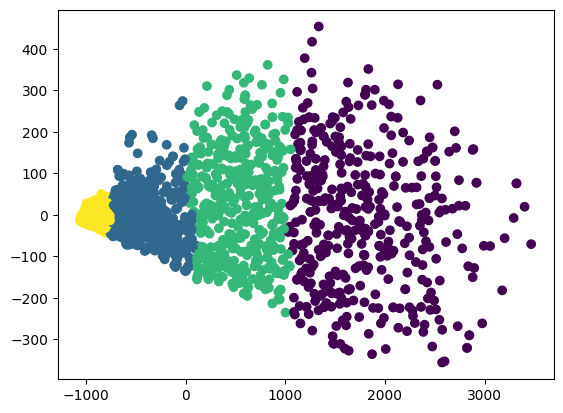

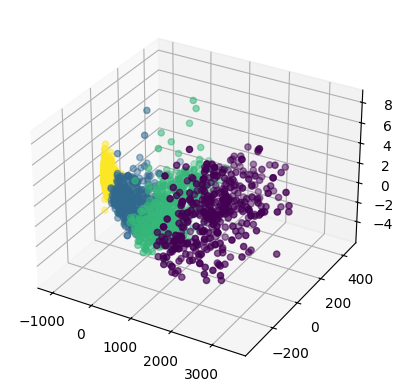

Davies-Bouldin Index: 0.555986226063063
Silhouette Score: 0.59594156652499
Calinski-Harabasz Index: 8368.861470590238


In [57]:
# Generate sample data
X = df_pca

# Compute the pairwise distances between samples
dist_matrix = squareform(pdist(X))

# Fit the Agglomerative Clustering model
agg_cluster = AgglomerativeClustering(n_clusters=4)
agg_cluster.fit(X)

# Plot the data points colored by their cluster labels in 2D
plt.scatter(X[:, 0], X[:, 1], c=agg_cluster.labels_, cmap='viridis')
plt.show()

# Plot the data points colored by their cluster labels in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=agg_cluster.labels_, cmap='viridis')
plt.show()

# Calculate the Davies-Bouldin Index
davies_bouldin_index = davies_bouldin_score(X, agg_cluster.labels_)
print("Davies-Bouldin Index:", davies_bouldin_index)
# Calculate the silhouette score
silhouette_score_value = silhouette_score(X, agg_cluster.labels_)

# Calculate the Calinski-Harabasz Index
calinski_harabasz_score_value = calinski_harabasz_score(X, agg_cluster.labels_)

print("Silhouette Score:", silhouette_score_value)
print("Calinski-Harabasz Index:", calinski_harabasz_score_value)

### **Ringkasan:**
Kode dimulai dengan memuat file yang dipisahkan tab ke dalam kerangka data Pandas. Ia kemudian melakukan
berbagai operasi untuk memahami struktur dan isi data, termasuk mendapatkan
jumlah baris dan kolom, memeriksa data yang hilang, dan mendapatkan ringkasan statistik. Itu
kode kemudian melakukan prapemrosesan data, termasuk pengkodean variabel kategori dan one-hot
penskalaan variabel numerik. Data tersebut kemudian direduksi menjadi 8 komponen menggunakan PCA, dan dua
algoritma pengelompokan (KMeans dan Agglomerative Clustering) diterapkan pada data.
Terakhir, berbagai metrik evaluasi digunakan untuk menilai kualitas hasil pengelompokan. Itu
kode memvisualisasikan hasil pengelompokan, serta hubungan antar yang berbeda
variabel dalam data, melalui berbagai jenis plot, antara lain histogram, plot kotak, sebar
alur, alur biola, dan alur berpasangan.